



# A simple overview on Housing dataset and its multiple affecting factors.


Purchasing a home is an enormous decision during a person’s life and wishes a substantial amount of
thought and research. One would really like to shop for a house at the simplest rate and minimum risk 
and would really like it to be the simplest investment for the longer term . Various online websites,
land agents and realtors attempt to guide home buyers by letting them compare different houses available for purchase.

In this article, we are getting to discuss the results obtained for a knowledge science project for
House price prediction. We try to visualise the data considering factors like Median income during a county, rate therein county, public schools, hospitals, hospital ratings and percentage within the county.

The aim of the project is to supply the simplest counties/areas within the USA to take a position certain a national land developer, individual buyers, banks trying to find an area to develop a replacement apartment house or to get . Another goal is to predict the house prices during a county within the next few months.

What is the anticipated price per sq ft of a range in a given zip code/ county within the next few months? Can we predict the worth supported crime rates, schools and other information/metrics provided by Zillow for a zipper code/neighborhood/county?

“Is 2020 an honest year to shop for a house?” and “Where should one buy a house?” are important questions. This House prediction project tries to answer these with the assistance of knowledge from various sources and considering factors which affect the house prices.


# Stakeholders for this type of project will be:

1) Customers and land Agents — the important estate industry has long operated consistent with its own traditions, but the supply of giant volumes of knowledge is revolutionizing the way the industry works. Big data analysis techniques are creating a replacement land market during which both customers and agents are better informed than ever before.

2) Companies — like Zillow and Trulia can use this analysis to calculate an estimated value of the worth that the house might attract supported factors like local schools, crime rates, income level, hospitals etc. and choose marketing strategy.

3) Banks — It’s not just consumers who are using big data to tell their house buying and selling decisions. Banks also are drawing on vast pools of knowledge to predict the danger that a specific loan application could pose, using information about both the worth of the house and therefore the applicant’s financial situation and history. additionally , banks also are avoiding losing out on foreclosure and short sales, as big data helps them to predict the utmost sale value that the market can bear.

Based on house prices predicted one can invest in land , find a city house better fitted to their needs where they will buy a house. House buying and selling decision would become a little easier with the prediction done by this data science project. 

Caution: Though this is not a production level analysis it needs further more data for finding correlation and affecting factors. Even for the depth analysis of houses it needs more data. Here those datas are not included because either they are no more on the internet or i am not reachable to those datasets.





# Data Used in this Project

1)    https://data.world/zillow-data/zhvi-all-homes   // for the home data

2)    https://bit.ly/3rQNgOg    // Crime verses Population

3)    https://data.world/zillow-data/increasing-values/file/Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv
      // Increasing home value in the neighbourhood

4)    https://www.kaggle.com/carlosaguayo/usa-hospitals   // USA Hospitals


5)    https://www.kaggle.com/carlosaguayo/2018-unemployment-rate-by-county   // Unemployment rate by County

6)    https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income   // List of maximum earning Per year            ststes or territories

7)    https://www.census.gov/newsroom/press-releases/2020/south-west-fastest-growing.html // Fastest growing cities data by        population.




# Challenges

1) Zillow Economics dataset — Difficulty find appropriate dataset from Zillow to figure on as no description is definitely available. Though Data dictionary is out there it doesn't specify every dataset included within the Zillow Economics dataset. No details about the varied csv files and therefore the way they're associated with one another and the details about different attributes.

2) didn't know what's FIPS, FIPS_ST, FIPS_CT and the way to relate it with counties or zip code

3) Finding appropriate datasets for various factors like Neighbourhood, schools, income levels, hospital, unemployment rating etc. After lot of searching found the datasets which might be utilized in this project.

4) Income Levels dataset has ZIP codes and no FIPS code, so I had to seek out an answer to convert ZIP codes to FIP codes. For this I had to look for a ZIPS to FIPS dataset and merge it with income level dataset. But I have not as of now so i will leave it as it is.

5) Income level dataset — Exploring and selecting appropriate attribute of median income level to use within the project

6) the way to explore these datasets to use them separately where i can not find a way to merge them in one useful dataset for prediction of house prices supported factors — Income level, rate , Schools, Hospitals, percentage etc.

# Notebook


1. Importing important libraries
2. Input of the base data(Zip_Zhvi_ALLHomes)
3. Data Story and Exploratory Data Analysis
4. Crime vs Population data
5. Neighborhood of All Homes data
6. Neighborhood Of Homes Increasing In Values_AllHomes data
7. Hospitals data
8. GeoFRED Unemployment Rate by County Percent data
9. Web Scraping for further data
10. U.S. Top states and territories by income
11. Highest earning State or Territory
12. Conclusion

# 1. Importing important libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")


# 2. Input of the base data(Zip_Zhvi_ALLHomes)

In [5]:
df= pd.read_csv('C:/Users/Abhinav kumar/Desktop/zillow/Zip_Zhvi_AllHomes.csv')

# 3. Data Story and Exploratory Data Analysis

Step 1: Data processing — transform raw data to time series with Month being the index
The data contains descriptive variable indicating the zip code, city, county, state and Region ID. It also contains an ordinal variable SizeRank, which after some data exploration, I assume ranks the zip codes by urbanization. More urbanized zip codes have a better rank. the info also provides median house prices for the time periods between April, 1996 to April, 2018. This are the values that i will be able to use to perform the statistic analysis. Before jumping straight into modeling and forecasting, there are pre-requisites the zip codes got to meet to be considered for investment by the real estate company.


In [6]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1134900.0,1118800,1108500,1110700,1128700,1174700,1236300,1281400,1290800,1282300
1,84654,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318100.0,318500,319600,321100,323100,324900,325600,325000,325600,327000
2,84616,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,415200.0,414700,415400,410700,400400,402400,411400,411800,412300,418200
3,93144,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,114600.0,115000,115000,114700,114600,114700,114500,114200,114100,113900
4,84640,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,200200.0,201700,203600,205000,204700,204200,204700,206700,209500,212000


In [7]:
print(f'Unique zip codes: {df.RegionName.nunique()}')

Unique zip codes: 15377


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15377 entries, 0 to 15376
Columns: 265 entries, RegionID to 2017-09
dtypes: float64(222), int64(39), object(4)
memory usage: 31.1+ MB


In [9]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
       '2017-06', '2017-07', '2017-08', '2017-09'],
      dtype='object', length=265)

In [10]:
missing_values_sum= df.isnull().sum()
print(missing_values_sum)

RegionID         0
RegionName       0
City             0
State            0
Metro         1144
              ... 
2017-05          0
2017-06          0
2017-07          0
2017-08          0
2017-09          0
Length: 265, dtype: int64


In [11]:
missing_values_percentage= df.isnull().mean()*100
print(missing_values_percentage)

RegionID      0.000000
RegionName    0.000000
City          0.000000
State         0.000000
Metro         7.439683
                ...   
2017-05       0.000000
2017-06       0.000000
2017-07       0.000000
2017-08       0.000000
2017-09       0.000000
Length: 265, dtype: float64


In [12]:
df1 = df.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis ='columns')
df1

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,10025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1134900.0,1118800,1108500,1110700,1128700,1174700,1236300,1281400,1290800,1282300
1,60657,146700.0,146500.0,146300.0,146300.0,146800.0,147100.0,147300.0,147800.0,148600.0,...,318100.0,318500,319600,321100,323100,324900,325600,325000,325600,327000
2,60614,198000.0,195500.0,194200.0,193800.0,193900.0,194500.0,195900.0,197900.0,200100.0,...,415200.0,414700,415400,410700,400400,402400,411400,411800,412300,418200
3,79936,70800.0,71000.0,71000.0,71400.0,71200.0,71600.0,72600.0,73100.0,72800.0,...,114600.0,115000,115000,114700,114600,114700,114500,114200,114100,113900
4,60640,102300.0,101300.0,100700.0,100600.0,100700.0,101300.0,102300.0,103200.0,104400.0,...,200200.0,201700,203600,205000,204700,204200,204700,206700,209500,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15372,97102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,645600.0,653100,649600,634000,621900,613500,606300,611400,626500,636700
15373,36564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,491100.0,500700,512900,524400,534600,538600,541900,544300,545200,544500
15374,3293,75600.0,76600.0,79000.0,79000.0,75600.0,72800.0,71200.0,69900.0,69800.0,...,175600.0,175100,173600,171400,169100,169300,171500,172800,172800,172900
15375,21405,253500.0,254000.0,255300.0,258200.0,261000.0,263400.0,267000.0,274800.0,282300.0,...,781600.0,779500,770200,761700,763200,772100,780400,783600,779500,774200


Dealing with the dataset from Zillow.com, I have to first select the city and reshape the data frame from wide to long
format using pd.melt and then transform to time series data.

In [13]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName'], var_name='Month', value_name = 'MeanValue')
    melted['Month'] = pd.to_datetime(melted['Month'], format = '%Y-%m')
    melted = melted.dropna(subset=['MeanValue'])
    return melted

In [14]:
df2 = melt_data(df1)
df2

,RegionName,Month,MeanValue
1,60657,1996-04-01,146700.0
2,60614,1996-04-01,198000.0
3,79936,1996-04-01,70800.0
4,60640,1996-04-01,102300.0
5,77084,1996-04-01,75600.0
...,...,...,...
3967261,97102,2017-09-01,636700.0
3967262,36564,2017-09-01,544500.0
3967263,3293,2017-09-01,172900.0
3967264,21405,2017-09-01,774200.0


In [15]:
df2.set_index('Month', inplace = True)
df2

,RegionName,MeanValue
Month,,
1996-04-01,60657,146700.0
1996-04-01,60614,198000.0
1996-04-01,79936,70800.0
1996-04-01,60640,102300.0
1996-04-01,77084,75600.0
...,...,...
2017-09-01,97102,636700.0
2017-09-01,36564,544500.0
2017-09-01,3293,172900.0


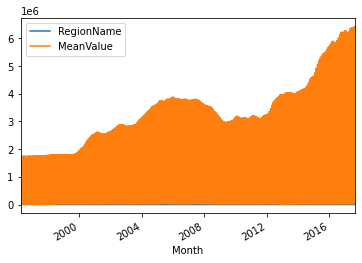

In [16]:
df2.plot()

An overall upward trend can be observed from the years 1996 to 2007, followed by a fluctuation from 2008 to mid-2010. Starting in 2011, the house price became more stable and continued to rise again. We can say pretty confidently that the house market crash in 2008 was the cause of this fluctuation and we do want to skip this period to have a more accurate prediction of the future. As you'll see, the housing bubble and crash of the mid-2000’s is sort of distinct. Since the bubble/crash period comprises fully one half the statistic at my disposal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002300003AB08>,
      dtype=object)

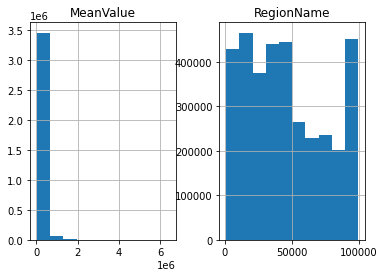

In [17]:
df2.hist()

# The real estate company has the following preferences:

Urbanization: Zip code should be in the top 25% according to the SizeRank variable.
    

#  Top 25% city 

In [18]:
#Get zipcodes with a size rank in the top 25% (highly urbanized zipcodes).
print(df.SizeRank.describe(),'\n')
#Calculate the 25% cutoff value.
sr_25 = df.SizeRank.quantile(q=0.25)
print(f'Size Rank 25% cutoff value: {sr_25}')
#Get data frame with selected zipcodes. Keep values and zipcodes only.
zc_top25= df[df['SizeRank']<sr_25].drop(['State','Metro','SizeRank'],axis=1)
print(f'Amount of zipcodes: {len(zc_top25)}')

count    15377.00000
mean      7689.00000
std       4439.10188
min          1.00000
25%       3845.00000
50%       7689.00000
75%      11533.00000
max      15377.00000
Name: SizeRank, dtype: float64 

Size Rank 25% cutoff value: 3845.0
Amount of zipcodes: 3844


# Median house price:
The zip code’s average house price should be between 1.5 decile below and 1 decile above the zip code’s 1-year median value. I chose a 1 year parameter to be realistic about the prices the real estate company will face most likely in the near future. This also reflects the purchasing power of the target market.

In [19]:
zc_top25['yr_avg']=zc_top25.iloc[:,-12:].mean(skipna=True, axis=1)
#Get zipcodes with an average value 1 decile above the median and 1.5 deciles below.
print(zc_top25['yr_avg'].describe(),'\n')
#Calculate the 60% cutoff value (1 decile above).
q_60 = zc_top25['yr_avg'].quantile(q=0.60)
print(f'Average Value 60% cutoff value: {round(q_60,2)}')
#Calculate the 35% cutoff value (1.5 deciles below).
q_35 = zc_top25['yr_avg'].quantile(q=0.35)
print(f'Average Value 35% cutoff value: {round(q_35,2)}')
#Get data frame with selected zipcodes.
zc_pref= zc_top25[(zc_top25['yr_avg']<q_60) & (zc_top25['yr_avg']>q_35)]
print(f'Amount of zipcodes: {len(zc_pref)}')

count    3.844000e+03
mean     2.981651e+05
std      2.536588e+05
min      3.473333e+04
25%      1.494438e+05
50%      2.213292e+05
75%      3.525083e+05
max      2.996742e+06
Name: yr_avg, dtype: float64 

Average Value 60% cutoff value: 257748.33
Average Value 35% cutoff value: 173633.33
Amount of zipcodes: 959


#  Risk: 
The real estate company has a risk averse investment strategy. Hence, the zip codes have to be selected according to a coefficient of variation below the 60 percentile.
# Returns:
Once I had filtered out the zip codes according to the company’s preferences, I chose the top 25 zip codes with the highest ROI.

In [20]:
#Calculate historical return on investment
zc_pref['ROI']= (zc_pref['2017-09']/zc_pref['1996-04'])-1
#Calculate standard deviation of monthly values
zc_pref['std']=zc_pref.loc[:,'1996-04':'2017-09'].std(skipna=True, axis=1)
#Calculate historical mean value
zc_pref['mean']=zc_pref.loc[:,'1996-04':'2017-09'].mean(skipna=True, axis=1)
#Calculate coefficient of variance
zc_pref['CV']=zc_pref['std']/zc_pref['mean']
#Show calculated values
zc_pref[['RegionName','std','mean','ROI','CV']].head(10)

,RegionName,std,mean,ROI,CV
4,60640,39968.355468,183309.689922,1.072336,0.218037
11,32162,53857.999680,183494.186047,1.687364,0.293513
14,37211,30529.639703,134788.759690,1.873918,0.226500
16,37013,19236.073300,131527.519380,1.174692,0.146251
19,28269,14796.156426,143482.945736,0.762827,0.103121
25,60613,40814.773102,189323.643411,0.990575,0.215582
28,21234,44745.127338,164727.131783,1.105046,0.271632
29,63376,26099.090391,152193.023256,0.849429,0.171487
43,85032,51343.490231,164986.821705,1.719376,0.311198
44,78130,27296.898955,136617.829457,1.390681,0.199805


After filtering and ranking the zip codes that met all of the criteria required by the real estate company,
I ended up with the following 25 zipcodes:
Now that I have 25 potential zip codes for the company to develop its new apartment building complex, 
I will proceed to perform time series analysis to rank this zip codes according
to forecasted 10-year returns.

In [21]:
#Descriptive statistics of coefficients of variance.
print(zc_pref.CV.describe())
#Define upper limit of CV according to risk profile.
upper_cv = zc_pref.CV.quantile(.6)
print(f'\nCV upper limit: {upper_cv}')
#Get the 25 zipcodes with highest ROIs within the firms risk profile.
zc_best25 = zc_pref[zc_pref['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:25]
print('\n Best 25 Zipcodes:')
#zc_best25[['RegionID','RegionName','City','CountyName','ROI','CV']]
zc_best25[['RegionName','ROI','CV']]

count    959.000000
mean       0.224422
std        0.084953
min        0.023531
25%        0.160792
50%        0.213109
75%        0.284068
max        0.548549
Name: CV, dtype: float64

CV upper limit: 0.2395566537961497

 Best 25 Zipcodes:


,RegionName,ROI,CV
14,37211,1.873918,0.226500
399,27705,1.794318,0.196174
324,27707,1.715375,0.178393
1947,37214,1.705570,0.194393
453,28205,1.703438,0.202170
534,37066,1.652709,0.215288
217,30080,1.629464,0.202658
3199,53095,1.619565,0.202703
1019,37087,1.616266,0.184745
257,60616,1.571856,0.230893


# 4. Crime vs Population data

In [22]:
crimevspop= pd.read_csv('C:/Users/Abhinav kumar/Desktop/zillow/crime_data_w_population_and_crime_rate.csv')

In [23]:
crimevspop.head()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31


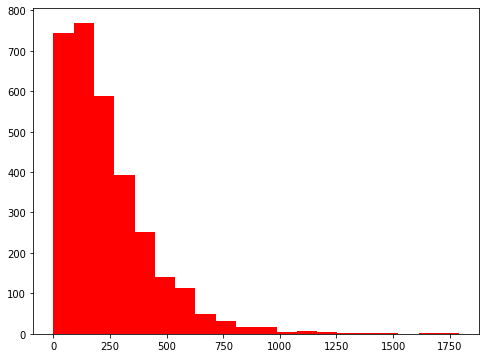

In [24]:
plt.figure(figsize = (8, 6))
plt.hist(crimevspop.crime_rate_per_100000, bins = 20, color = "r")
plt.show()

In [25]:
crimevspop.describe()

,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
count,3136.000000,3136.000000,3136.0,3136.0,3136.000000,3.136000e+03,3.136000e+03,3136.000000,3136.000000,3136.000000,...,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3.136000e+03,3136.000000,3136.000000
mean,235.085665,1568.500000,1.0,4.0,1590.655612,9.977578e+04,9.841005e+04,6.201212,5.400510,98.154624,...,26.324936,112.447704,238.644133,660.654337,1923.397959,227.536671,16.765625,1.007329e+05,30.339286,103.628827
std,200.502872,905.429548,0.0,0.0,916.038464,3.198554e+05,3.189017e+05,8.104974,7.532491,8.311058,...,79.309098,666.311425,931.091864,2242.359745,6435.993731,1253.236660,67.970823,3.226566e+05,15.112433,107.987364
min,0.000000,1.000000,1.0,4.0,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+01,1.000000,1.000000
25%,94.641916,784.750000,1.0,4.0,797.750000,1.120325e+04,1.013975e+04,2.000000,2.000000,100.000000,...,1.000000,0.000000,10.000000,37.000000,81.000000,6.000000,0.000000,1.109275e+04,19.000000,35.000000
50%,185.948066,1568.500000,1.0,4.0,1588.500000,2.596550e+04,2.478250e+04,4.000000,3.000000,100.000000,...,5.000000,4.000000,36.000000,131.000000,348.500000,22.000000,3.000000,2.581250e+04,29.000000,79.000000
75%,321.367803,2352.250000,1.0,4.0,2385.250000,6.628100e+04,6.603775e+04,7.000000,6.000000,100.000000,...,19.000000,22.000000,124.000000,416.500000,1205.250000,74.000000,9.000000,6.758225e+04,45.000000,133.000000
max,1791.995377,3136.000000,1.0,4.0,3177.000000,9.980757e+06,9.980757e+06,150.000000,140.000000,100.000000,...,1976.000000,18923.000000,23057.000000,49107.000000,142604.000000,40555.000000,2210.000000,1.001707e+07,56.000000,840.000000


From the histogram and the statistical data we can see that the average rate of crime per 100000 is 235. Top 25 percentile is just less than 95. Top 50 percentile of the crime is below 186. Top 75 percentile is approximate than 321, and maximum of the crime per 100000 is less 1792.

In [26]:
crp=crimevspop[crimevspop['crime_rate_per_100000']<500]
crp

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
306,"Franklin County, AL",497.906888,307,1,4,30,32012,32012,5,5,...,10,13,134,216,494,35,2,31532,1,59
307,"Geary County, KS",497.539054,308,1,4,926,35503,35503,3,3,...,12,13,160,166,510,32,7,37384,20,61
308,"Tallapoosa County, AL",497.536587,309,1,4,62,40074,40745,7,6,...,6,17,179,296,809,52,4,41203,1,123
309,"DeWitt County, TX",497.488172,310,1,4,2612,18371,20558,3,4,...,10,5,87,124,290,21,1,20503,48,123
310,"Bay County, FL",497.179791,311,1,4,328,172174,172174,20,12,...,70,168,623,1558,5538,295,20,174987,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,"Ohio County, IN",0.000000,3132,1,4,762,6084,0,2,1,...,0,0,0,2,2,0,0,5994,18,115
3132,"Newton County, MS",0.000000,3133,1,4,1465,21545,3346,3,1,...,0,0,0,4,0,1,0,21689,28,101
3133,"Jerauld County, SD",0.000000,3134,1,4,2424,2108,2108,1,1,...,0,0,0,1,3,1,0,2066,46,73
3134,"Cimarron County, OK",0.000000,3135,1,4,2167,2502,2502,2,2,...,0,0,0,1,2,0,0,2335,40,25


Here we are going through total crimes per 100000 in the County

In [83]:
(pd.DataFrame(crimevspop.groupby("county_name")["crime_rate_per_100000"].mean())).sort_values("crime_rate_per_100000", ascending = False).astype(int).head(20)

,crime_rate_per_100000
county_name,
"St. Louis city, MO",1791
"Crittenden County, AR",1754
"Alexander County, IL",1664
"Kenedy County, TX",1456
"De Soto Parish, LA",1447
"Baltimore city, MD",1419
"Shelby County, TN",1315
"Marlboro County, SC",1253
"Storey County, NV",1217


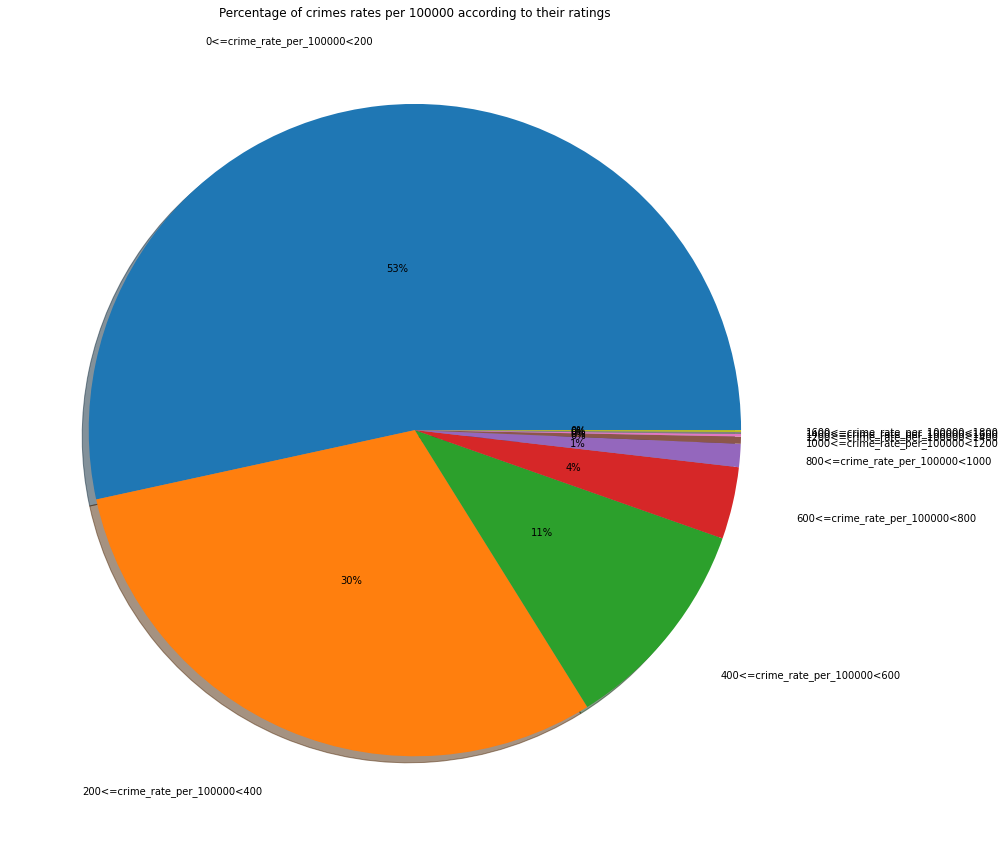

In [28]:
slices=[((crimevspop['crime_rate_per_100000']>=0) & (crimevspop['crime_rate_per_100000']<200)).sum(),
        ((crimevspop['crime_rate_per_100000']>=200) & (crimevspop['crime_rate_per_100000']<400)).sum(),
        ((crimevspop['crime_rate_per_100000']>=400) & (crimevspop['crime_rate_per_100000']<600)).sum(),
        ((crimevspop['crime_rate_per_100000']>=600) & (crimevspop['crime_rate_per_100000']<800)).sum(),
        ((crimevspop['crime_rate_per_100000']>=800) & (crimevspop['crime_rate_per_100000']<1000)).sum(),
        ((crimevspop['crime_rate_per_100000']>=1000) & (crimevspop['crime_rate_per_100000']<1200)).sum(),
        ((crimevspop['crime_rate_per_100000']>=1200) & (crimevspop['crime_rate_per_100000']<1400)).sum(),
        ((crimevspop['crime_rate_per_100000']>=1400) & (crimevspop['crime_rate_per_100000']<1600)).sum(),
        ((crimevspop['crime_rate_per_100000']>=1600) & (crimevspop['crime_rate_per_100000']<1800)).sum()]
labels=['0<=crime_rate_per_100000<200','200<=crime_rate_per_100000<400','400<=crime_rate_per_100000<600','600<=crime_rate_per_100000<800','800<=crime_rate_per_100000<1000','1000<=crime_rate_per_100000<1200','1200<=crime_rate_per_100000<1400','1400<=crime_rate_per_100000<1600','1600<=crime_rate_per_100000<1800']
plt.pie(slices,labels=labels, autopct='%1.0f%%',pctdistance=0.5,labeldistance=1.2,shadow=True)
fig=plt.gcf()
plt.title("Percentage of crimes rates per 100000 according to their ratings")
fig.set_size_inches(15,15)
plt.show()

There is 53% county where no. of crime is less than 200. There is 30% county where no. of crime is less than 400.  There is 11% county where no. of crime is less than 600.  There is 4% county where no. of crime is less than 800. There is 1% county where no of crime is less than 1000. And more than 1000 is very less percentage.    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023000241988>,
      dtype=object)

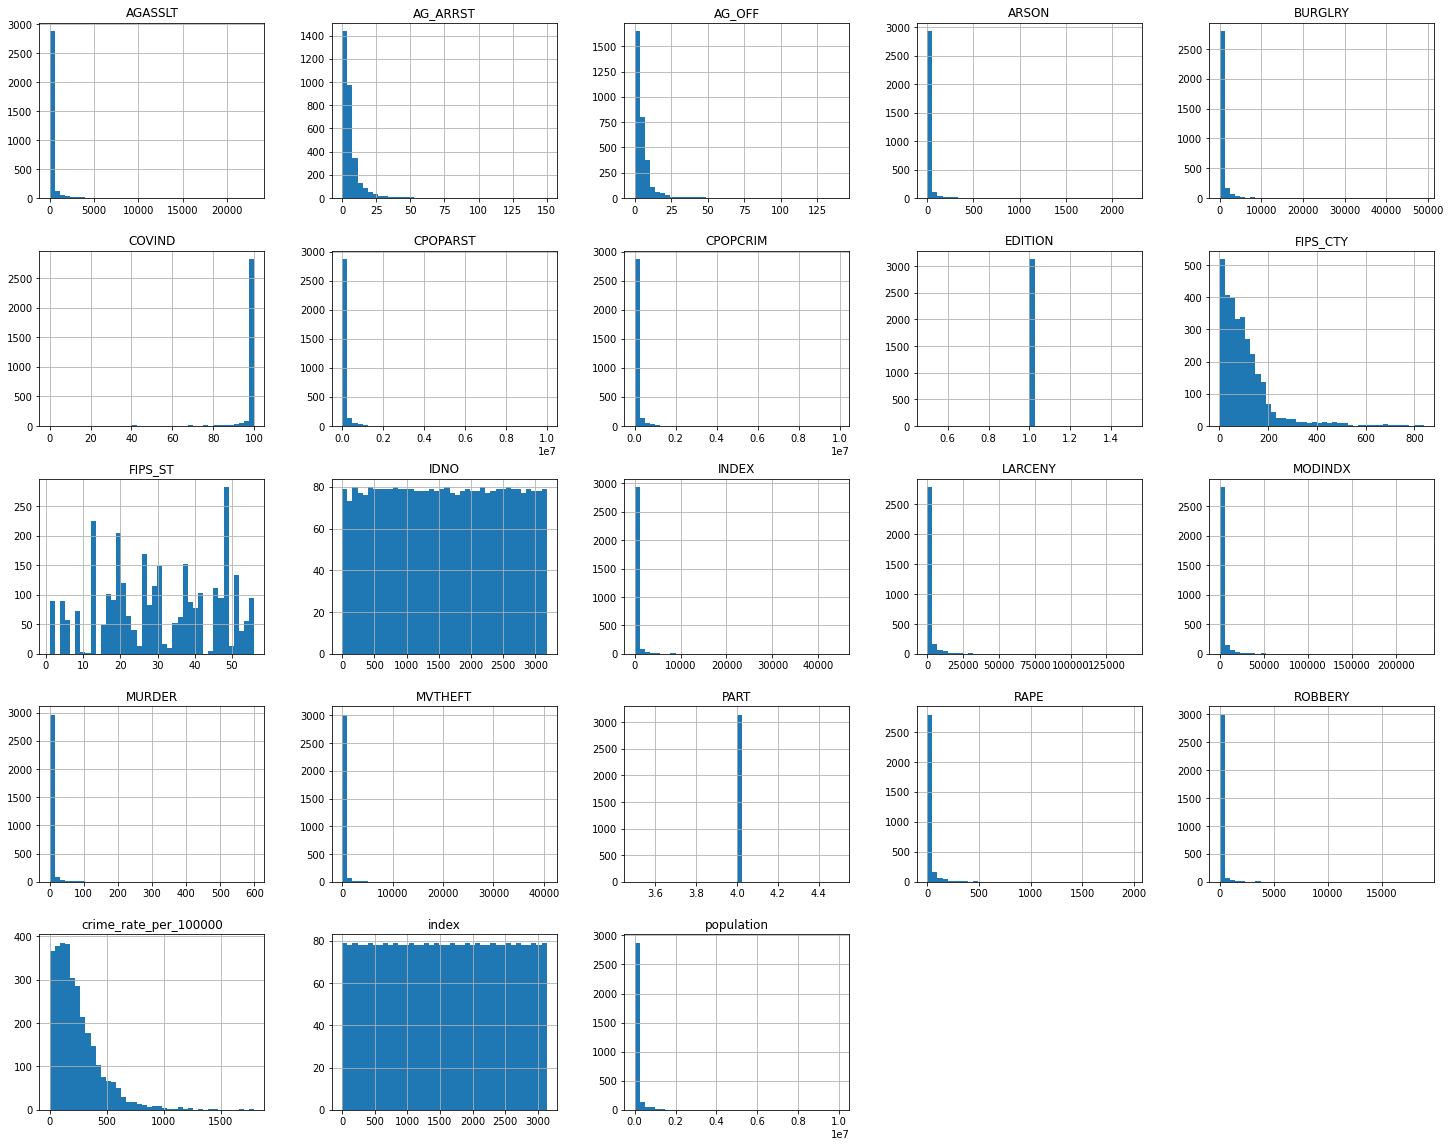

In [29]:
crimevspop.hist(bins=40,figsize=(25,20))

From the graphs we can see that motorvehicle(MVTHEFT) and robbery is most happend crime incident. Murder is veryless happening crime. Rape is more than Murder.

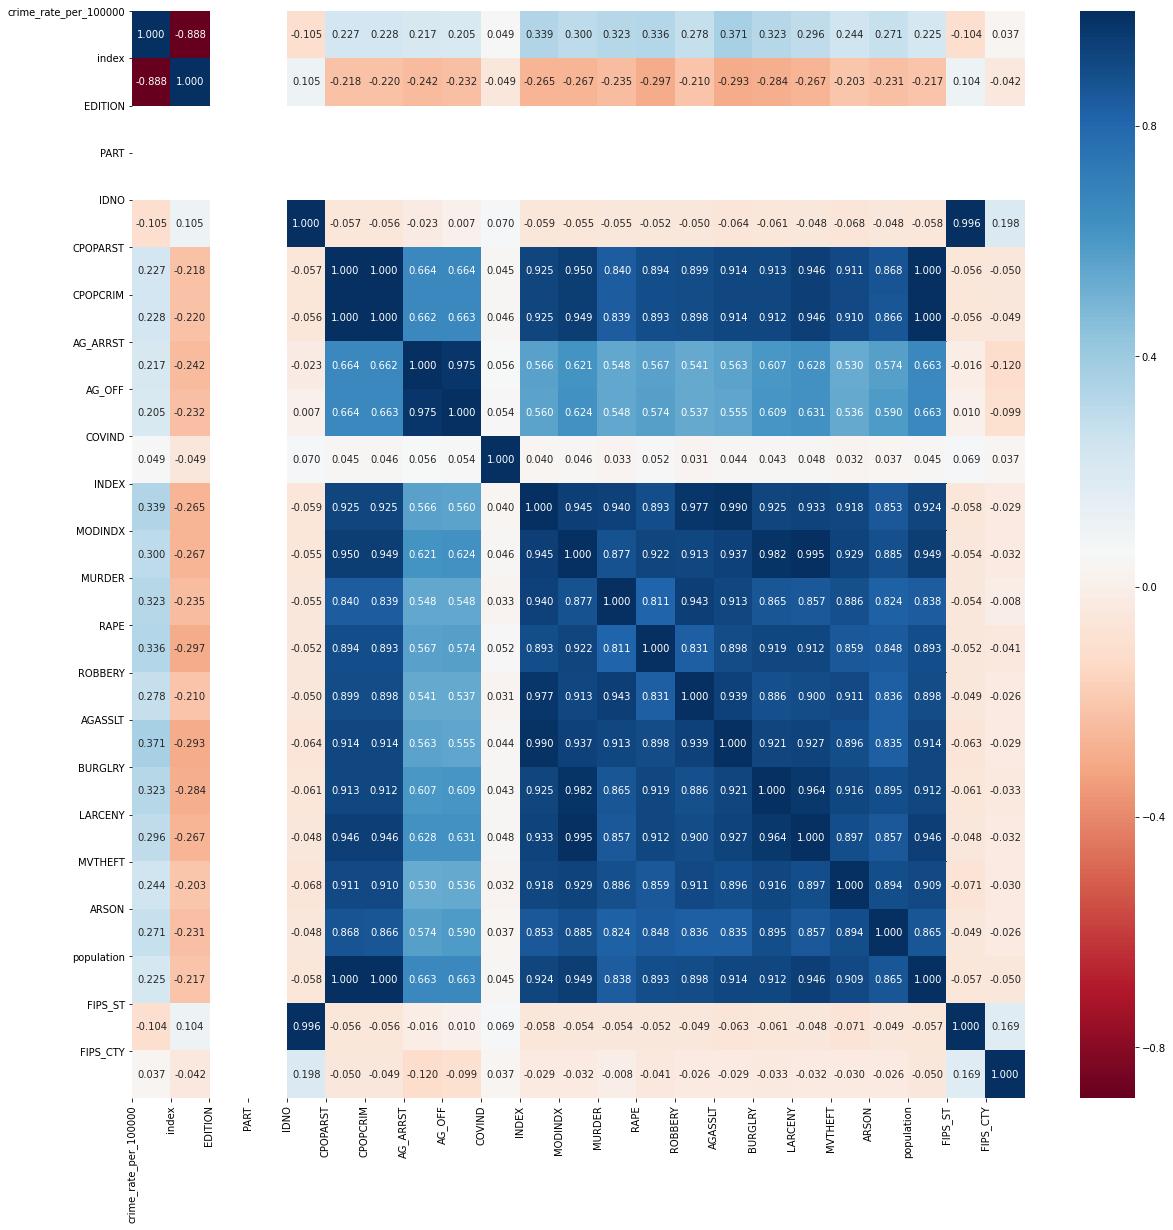

In [30]:
corr = crimevspop.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".3f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

So here we can see the correlation between the different attribute.
Larceny and Population is = 0.946
Larceny and MVTHEFT is = 0.897
Larceny and Rape is = 0.912
Larceny and Robbery is = 0.900
Larceny and Assault is = 0.927
Larceny and Murder is = 0.857
Rape and MVTHEFT is = 0.859
Rape and Populatoin is = 0.893
Rape and Robbery is = 0.831
Population and Robbery is = 0.898
Murder and Rape is = 0.811
Murder and MVTHEFT is = 0.886
Assult and MVTHEFT is = 0.896
Assult and Robbery is = 0.939
Assult and Rape is = 0.898
Assult and Murder is = 0.913
Population and Murder is = 0.838
Burglry and Murder is = 0.865
Burglry and Rape is = 0.919
Burglry and Robbery is = 0.886
Burglry and Assult is = 0.921
Burglry and MVTHEFT is = 0.916


Here MVTHEFT is Motor Vehicle theft.


# 5. Neighborhood of All Homes data

In [31]:
Neighborhood_Zhvi_AllHomes = pd.read_csv('C:/Users/Abhinav kumar/Desktop/zillow/Neighborhood_Zhvi_AllHomes.csv')

In [32]:
Neighborhood_Zhvi_AllHomes.head()
#Neighborhood_Zhvi_AllHomes.shape

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,NaN,NaN,NaN,...,277500,278300,281600,285900,289900,292900,292900,291800,290900,290100
1,192689,Paradise,Las Vegas,NV,Las Vegas,Clark,2,115400.0,115300.0,115500.0,...,196500,199100,201400,202900,204200,206300,208900,211100,213400,215500
2,112345,Maryvale,Phoenix,AZ,Phoenix,Maricopa,3,58900.0,58900.0,58900.0,...,147500,148300,148600,148900,149500,150800,152500,153900,155100,156100
3,27080,Sherman Oaks,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4,216200.0,218200.0,218900.0,...,869700,872500,876200,879500,882400,886400,891100,896200,903200,910200
4,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,5,117600.0,118700.0,119600.0,...,401900,406100,411000,417300,423400,427100,429700,432500,435300,437500


In [33]:
#Get region with a size rank in the top 25% (highly urbanized zipcodes).
print(Neighborhood_Zhvi_AllHomes.SizeRank.describe(),'\n')
#Calculate the 25% cutoff value.
nbd_sr_25 = Neighborhood_Zhvi_AllHomes.SizeRank.quantile(q=0.25)
print(f'Size Rank 25% cutoff value: {sr_25}')
#Get data frame with selected zipcodes. Keep values and zipcodes only.
nbd_zc_top25=Neighborhood_Zhvi_AllHomes[Neighborhood_Zhvi_AllHomes['SizeRank']<sr_25].drop(['State','Metro','SizeRank'],axis=1)
print(f'Amount of zipcodes: {len(nbd_zc_top25)}')

count    5802.000000
mean     2901.500000
std      1675.037462
min         1.000000
25%      1451.250000
50%      2901.500000
75%      4351.750000
max      5802.000000
Name: SizeRank, dtype: float64 

Size Rank 25% cutoff value: 3845.0
Amount of zipcodes: 3844


In [34]:
nbd_zc_top25['yr_avg']=nbd_zc_top25.iloc[:,-12:].mean(skipna=True, axis=1)
#Get zipcodes with an average value 1 decile above the median and 1.5 deciles below.
print(nbd_zc_top25['yr_avg'].describe(),'\n')
#Calculate the 60% cutoff value (1 decile above).
nbd_q_60 = nbd_zc_top25['yr_avg'].quantile(q=0.60)
print(f'Average Value 60% cutoff value: {round(q_60,2)}')
#Calculate the 35% cutoff value (1.5 deciles below).
nbd_q_35 = nbd_zc_top25['yr_avg'].quantile(q=0.35)
print(f'Average Value 35% cutoff value: {round(q_35,2)}')
#Get data frame with selected zipcodes.
nbd_zc_pref= nbd_zc_top25[(nbd_zc_top25['yr_avg']<q_60) & (nbd_zc_top25['yr_avg']>q_35)]
#print(f'Amount of zipcodes: {len(zc_pref)}')

count    3.844000e+03
mean     3.655196e+05
std      3.648437e+05
min      3.114167e+04
25%      1.446104e+05
50%      2.604708e+05
75%      4.569479e+05
max      5.100792e+06
Name: yr_avg, dtype: float64 

Average Value 60% cutoff value: 257748.33
Average Value 35% cutoff value: 173633.33


In [35]:
# from the first zhvi data
zc_best25[['RegionID','RegionName','City','CountyName','ROI','CV']]

,RegionID,RegionName,City,CountyName,ROI,CV
14,74242,37211,Nashville,Davidson,1.873918,0.226500
399,69489,27705,Durham,Durham,1.794318,0.196174
324,69491,27707,Durham,Durham,1.715375,0.178393
1947,74245,37214,Nashville,Davidson,1.705570,0.194393
453,69768,28205,Charlotte,Mecklenburg,1.703438,0.202170
534,74147,37066,Gallatin,Sumner,1.652709,0.215288
217,70859,30080,Smyrna,Cobb,1.629464,0.202658
3199,81211,53095,Town of West Bend,Washington,1.619565,0.202703
1019,74166,37087,Lebanon,Wilson,1.616266,0.184745
257,84618,60616,Chicago,Cook,1.571856,0.230893


After comparing the city and county From this data we got to know that 
Nashville, Saint paul, Minnepolis, Charlotte, Lakewood, Parkland, Spanaway, Roseville, Saint Louise Park cities 
has potential growing neighbours. And if we see to the neighbourhoods of the city then the whole county of these cities Hennepin, Davidson, Ramsey, Mecklenburg, Pierce Counties are Good in return on investment. So good to go.


So from crime data and Neighbourhood data we can conclude that top crime cities are not in the list of top Invested city which gives high Return on Investment.That means people are not investing in that cities where crime rate is high. There may be some other factors but this is also one of that. 

# 6. Neighborhood Of Homes Increasing In Values_AllHomes data

In [36]:
Neighborhood_PctOfHomesIncreasingInValues_AllHomes = pd.read_csv('C:/Users/Abhinav kumar/Desktop/zillow/Neighborhood_PctOfHomesIncreasingInValues_AllHomes.csv')

In [84]:
# Printting the top 5 data
Neighborhood_PctOfHomesIncreasingInValues_AllHomes.head(20)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1997-02,1997-03,1997-04,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,NaN,NaN,NaN,...,96.63,94.91,93.59,93.09,92.45,91.09,90.04,69.01,71.36,73.79
1,192689,Paradise,Las Vegas,NV,Las Vegas,Clark,2,51.250000,65.830000,66.030000,...,94.58,95.00,95.41,95.91,95.30,96.41,96.86,91.66,94.59,95.62
2,112345,Maryvale,Phoenix,AZ,Phoenix,Maricopa,3,87.330000,87.290000,79.160000,...,98.04,98.07,98.11,98.02,97.94,98.03,98.61,96.32,97.81,97.66
3,27080,Sherman Oaks,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4,43.780000,42.700000,47.980000,...,87.28,85.70,83.39,81.45,81.77,80.01,80.33,71.67,76.02,77.94
4,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,5,56.010000,65.100000,56.850000,...,97.84,98.21,98.52,98.77,98.85,98.83,98.65,94.40,96.09,96.50
5,192820,Sunrise Manor,Las Vegas,NV,Las Vegas,Clark,6,63.780000,53.700000,43.380000,...,96.46,96.52,96.16,95.85,96.60,97.77,97.94,92.24,95.36,97.12
6,194430,East New York,New York,NY,New York,Kings,7,69.670000,55.070000,32.490000,...,73.86,77.57,83.03,90.70,94.80,94.95,94.41,92.60,90.70,92.01
7,192796,Spring Valley,Las Vegas,NV,Las Vegas,Clark,8,52.430000,51.830000,46.850000,...,93.40,94.42,94.31,94.67,95.10,96.02,96.33,93.82,95.18,96.02
8,268496,Southeast Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,9,63.020000,57.490000,48.370000,...,98.28,97.79,97.57,97.38,97.28,97.24,97.28,93.49,95.58,96.38
9,112547,Paradise Valley,Phoenix,AZ,Phoenix,Maricopa,10,73.260000,72.720000,71.920000,...,87.13,87.65,87.39,86.85,86.41,87.60,88.43,83.67,85.88,86.37


In [38]:
# Here we will be dropping the column name of no more use to melt it for time series analysis.
dfn1 = df.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis ='columns')

In [39]:
dfn1

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,10025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1134900.0,1118800,1108500,1110700,1128700,1174700,1236300,1281400,1290800,1282300
1,60657,146700.0,146500.0,146300.0,146300.0,146800.0,147100.0,147300.0,147800.0,148600.0,...,318100.0,318500,319600,321100,323100,324900,325600,325000,325600,327000
2,60614,198000.0,195500.0,194200.0,193800.0,193900.0,194500.0,195900.0,197900.0,200100.0,...,415200.0,414700,415400,410700,400400,402400,411400,411800,412300,418200
3,79936,70800.0,71000.0,71000.0,71400.0,71200.0,71600.0,72600.0,73100.0,72800.0,...,114600.0,115000,115000,114700,114600,114700,114500,114200,114100,113900
4,60640,102300.0,101300.0,100700.0,100600.0,100700.0,101300.0,102300.0,103200.0,104400.0,...,200200.0,201700,203600,205000,204700,204200,204700,206700,209500,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15372,97102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,645600.0,653100,649600,634000,621900,613500,606300,611400,626500,636700
15373,36564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,491100.0,500700,512900,524400,534600,538600,541900,544300,545200,544500
15374,3293,75600.0,76600.0,79000.0,79000.0,75600.0,72800.0,71200.0,69900.0,69800.0,...,175600.0,175100,173600,171400,169100,169300,171500,172800,172800,172900
15375,21405,253500.0,254000.0,255300.0,258200.0,261000.0,263400.0,267000.0,274800.0,282300.0,...,781600.0,779500,770200,761700,763200,772100,780400,783600,779500,774200


In [40]:
#Get zipcodes with a size rank in the top 25% (highly urbanized zipcodes).
print(df.SizeRank.describe(),'\n')
#Calculate the 25% cutoff value.
sr_25 = df.SizeRank.quantile(q=0.25)
print(f'Size Rank 25% cutoff value: {sr_25}')
#Get data frame with selected zipcodes. Keep values and zipcodes only.
zc_top25= df[df['SizeRank']<sr_25].drop(['State','Metro','SizeRank'],axis=1)
print(f'Amount of zipcodes: {len(zc_top25)}')

count    15377.00000
mean      7689.00000
std       4439.10188
min          1.00000
25%       3845.00000
50%       7689.00000
75%      11533.00000
max      15377.00000
Name: SizeRank, dtype: float64 

Size Rank 25% cutoff value: 3845.0
Amount of zipcodes: 3844


From the above data we can see that the house price is maximum up to 15377 and 1 is minimum. The mean is 7689 and quantile house price is less equal to 3845. Top 50% houses is under 7689,  and top 75% house price is under 11533. 

In [41]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName'], var_name='Month', value_name = 'MeanValue')
    melted['Month'] = pd.to_datetime(melted['Month'], format = '%Y-%m')
    melted = melted.dropna(subset=['MeanValue'])
    return melted

In [42]:
# Melting data to use further in Time series
dfn2= melt_data(dfn1)

In [43]:
dfn2

,RegionName,Month,MeanValue
1,60657,1996-04-01,146700.0
2,60614,1996-04-01,198000.0
3,79936,1996-04-01,70800.0
4,60640,1996-04-01,102300.0
5,77084,1996-04-01,75600.0
...,...,...,...
3967261,97102,2017-09-01,636700.0
3967262,36564,2017-09-01,544500.0
3967263,3293,2017-09-01,172900.0
3967264,21405,2017-09-01,774200.0


In [44]:
# setting index to Month
dfn2.set_index('Month', inplace = True)
dfn2

,RegionName,MeanValue
Month,,
1996-04-01,60657,146700.0
1996-04-01,60614,198000.0
1996-04-01,79936,70800.0
1996-04-01,60640,102300.0
1996-04-01,77084,75600.0
...,...,...
2017-09-01,97102,636700.0
2017-09-01,36564,544500.0
2017-09-01,3293,172900.0


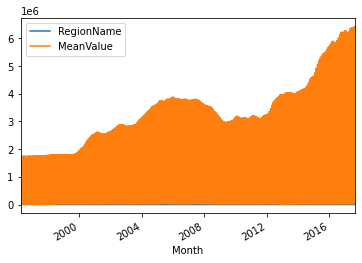

In [45]:
dfn2.plot()

 we can see from the graph that the house rate in the neighbourhood is also suffering from the same trend. Before 2000 house price is almost constant and After 2000 there is a sharp uptrend till 2007 after it is going to fall till 2009 then aftyer it is increasing then little consolidating then increasing till 2014 and after 2014 this is increasing. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002302B08BD88>,
      dtype=object)

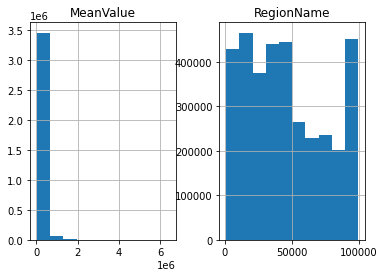

In [46]:
dfn2.hist()

# 7. Hospitals data

In [47]:
Hospitals = pd.read_csv('C:/Users/Abhinav kumar/Desktop/zillow/Hospitals.csv')

In [85]:
Hospitals.head(20)

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-94.945477,29.747620,8497,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,1700 JAMES BOWIE DRIVE,BAYTOWN,TX,77520,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,http://www.houstonmethodist.org/locations/san-...,NOT AVAILABLE,NOT AVAILABLE,48.0,NON-PROFIT,-999.0,182.0,NOT AVAILABLE,Y
1,-82.881843,40.027143,8498,129043230,"WOODS AT PARKSIDE,THE",349 OLDE RIDENOUR ROAD,COLUMBUS,OH,43230,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.thewoodsatparkside.com/,1815,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,50.0,NOT AVAILABLE,NOT AVAILABLE
2,-84.168027,39.774242,8499,130045404,DAYTON CHILDREN'S HOSPITAL,ONE CHILDRENS PLAZA,DAYTON,OH,45404,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.childrensdayton.org/cms/home/index....,1411,NOT AVAILABLE,39.0,NON-PROFIT,-999.0,155.0,PEDIATRIC LEVEL II,Y
3,-80.632972,41.005169,8500,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,8049 SOUTH AVENUE,BOARDMAN,OH,44512,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.mahoningvalleyhospital.com/,1428,MAHONING VALLEY HOSPITAL BOARDMAN CAMPUS,39.0,PROPRIETARY,-999.0,45.0,NOT AVAILABLE,NOT AVAILABLE
4,-84.199398,39.747740,8501,129845417,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,"ONE ELIZABETH PLACE,E3 SUITE A",DAYTON,OH,45417,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,https://dayton.havenbehavioral.com/,1506,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,32.0,NOT AVAILABLE,NOT AVAILABLE
5,-96.927096,35.297262,8502,130774801,CHG CORNERSTONE HOSPITAL OF OKLAHOMA,"1900 GORDON COOPER DRIVE,2ND FLOOR",SHAWNEE,OK,74801,NOT AVAILABLE,...,2018-04-20T00:00:00.000Z,http://www.chghospitals.com/shawnee/,2363,SOLARA HOSPITAL SHAWNEE,40.0,PROPRIETARY,-999.0,34.0,NOT AVAILABLE,NOT AVAILABLE
6,-96.223731,34.539347,8503,131074538,MARY HURLEY HOSPITAL,6 NORTH COVINGTON AVENUE,COALGATE,OK,74538,NOT AVAILABLE,...,2018-04-20T00:00:00.000Z,http://www.ccghospital.com/Hospital/,2201,COAL COUNTY GENERAL HOSPITAL,40.0,NON-PROFIT,-999.0,20.0,LEVEL IV,Y
7,-101.294085,48.232226,8504,5258701,TRINITY HOSPITALS,1 W BURDICK EXPY,MINOT,ND,58701,NOT AVAILABLE,...,2017-10-02T00:00:00.000Z,http://www.trinityhealth.org,5055A,NOT AVAILABLE,38.0,NON-PROFIT,-999.0,251.0,LEVEL II,Y
8,-80.231076,36.418068,8505,10527016,LIFEBRITE COMMUNITY HOSPITAL OF STOKES,1570 NC 8 & 89 HWY NORTH,DANBURY,NC,27016,NOT AVAILABLE,...,2017-11-09T00:00:00.000Z,http://lifebritestokes.com/,NOT AVAILABLE,PIONEER COMMUNITY HOSPITAL OF STOKES,37.0,PROPRIETARY,-999.0,93.0,NOT AVAILABLE,NOT AVAILABLE
9,-95.440687,30.014288,8506,77677090,PROVIDENCE HOSPITAL OF NORTH HOUSTON LLC,16750 RED OAK DR,HOUSTON,TX,77090,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,http://phnh.net/,NOT AVAILABLE,NOT AVAILABLE,48.0,PROPRIETARY,-999.0,16.0,NOT AVAILABLE,NOT AVAILABLE


In [49]:
Hospitals.shape

(7570, 34)

In [50]:
Hospitals.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF',
       'BEDS', 'TRAUMA', 'HELIPAD'],
      dtype='object')

In [87]:
Hospitals[['CITY','COUNTY']].head(20)

,CITY,COUNTY
0,BAYTOWN,HARRIS
1,COLUMBUS,FRANKLIN
2,DAYTON,MONTGOMERY
3,BOARDMAN,MAHONING
4,DAYTON,MONTGOMERY
5,SHAWNEE,POTTAWATOMIE
6,COALGATE,COAL
7,MINOT,WARD
8,DANBURY,STOKES
9,HOUSTON,HARRIS


From the data we can see that top growing cities with highest return of investment there are very uneven distribution of hospitals.
There are enough hospitals in big cities but in small or growing cities hospitals are less. But this is also a kind of Opportunity as hospitals als need buildings which are on a big area and hundreds of rooms and multiple story. So we can do further more reserch on these ares for the better insite.

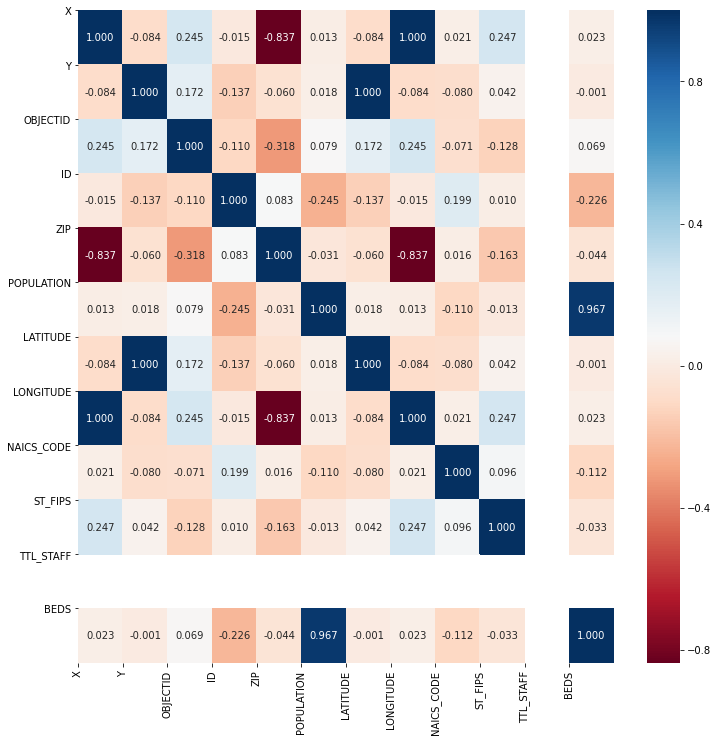

In [52]:
corr = Hospitals.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(12, 12))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".3f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

correlation between BEDS and POPULATION is = 0.967
correlation between ZIP and POPULATION is = -0.031 

# 8. GeoFRED Unemployment Rate by County Percent data

In [53]:
GeoFRED_Unemployment_Rate_by_County_Percent = pd.read_csv('C:/Users/Abhinav kumar/Desktop/zillow/GeoFRED_Unemployment_Rate_by_County_Percent.csv')

In [88]:
GeoFRED_Unemployment_Rate_by_County_Percent.head(20)

,Series ID,Region Name,Region Code,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,SCABBE1URN,"Abbeville County, SC",45001,3.8,6.6,7.7,9.1,8.2,7.7,8.8,...,14.2,13.6,12.5,10.6,9.5,7.7,6.9,5.5,4.6,4.2
1,LAACAD0URN,"Acadia Parish, LA",22001,5.8,6.0,6.3,6.8,5.8,6.1,3.6,...,6.5,7.3,6.7,6.0,6.0,5.8,6.9,7.4,5.9,5.4
2,VAACCO1URN,"Accomack County, VA",51001,3.0,3.4,4.2,4.4,4.7,4.7,4.3,...,6.5,7.9,8.4,7.9,7.2,6.7,5.5,5.0,4.9,4.1
3,IDADAC1URN,"Ada County, ID",16001,3.4,3.9,4.7,4.9,4.1,3.3,2.7,...,8.9,8.3,7.3,6.2,5.2,4.2,3.7,3.3,2.8,2.4
4,OKADAI1URN,"Adair County, OK",40001,3.5,4.1,4.8,7.8,6.2,4.8,4.4,...,8.0,10.5,9.2,9.1,9.8,8.0,6.1,5.9,5.0,4.4
5,IAADAI1URN,"Adair County, IA",19001,2.7,2.8,3.7,4.1,4.2,4.0,3.2,...,5.8,5.5,4.9,4.4,4.2,4.0,3.3,3.0,2.8,2.4
6,MOADURN,"Adair County, MO",29001,3.1,4.3,4.4,4.9,5.0,4.3,4.3,...,6.6,8.7,8.6,7.0,6.9,6.5,5.6,5.7,4.4,3.7
7,KYADURN,"Adair County, KY",21001,5.0,4.8,5.4,5.9,5.3,5.6,5.7,...,10.8,12.4,11.8,9.5,10.1,8.6,7.4,6.9,6.3,5.3
8,WAADAM1URN,"Adams County, WA",53001,8.6,9.4,9.4,9.1,8.2,7.2,6.9,...,9.1,10.6,10.2,9.2,8.5,7.3,7.1,6.5,5.9,5.7
9,INADAM1URN,"Adams County, IN",18001,2.8,4.9,4.6,4.3,4.1,4.8,4.4,...,14.6,10.1,7.8,7.0,6.1,4.6,3.8,3.6,2.6,2.6


In [94]:
GeoFRED_Unemployment_Rate_by_County_Percent['Region Name'].value_counts().head()

Harrison County, KY     1
Claiborne Parish, LA    1
Itasca County, MN       1
Marion County, TN       1
Frontier County, NE     1
Name: Region Name, dtype: int64

In [95]:
dfg1 = GeoFRED_Unemployment_Rate_by_County_Percent.drop(['Series ID','Region Name'], axis ='columns')

In [96]:
dfg1.max()

Region Code    56045.0
2000              17.4
2001              17.4
2002              19.4
2003              18.2
2004              20.4
2005              21.0
2006              20.8
2007              20.5
2008              22.4
2009              27.3
2010              28.8
2011              28.9
2012              27.4
2013              25.4
2014              24.0
2015              24.1
2016              23.6
2017              19.1
2018              17.5
dtype: float64

In [97]:
dfg1.min()

Region Code    1001.0
2000              1.4
2001              1.6
2002              1.5
2003              1.9
2004              1.7
2005              2.1
2006              1.7
2007              1.5
2008              1.3
2009              2.1
2010              2.1
2011              1.4
2012              1.1
2013              1.2
2014              1.2
2015              1.8
2016              1.7
2017              1.6
2018              1.4
dtype: float64

In [98]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['Region Code'], var_name='Year', value_name = 'MeanValue')
    melted['Year'] = pd.to_datetime(melted['Year'], format = '%Y-%m')
    melted = melted.dropna(subset=['MeanValue'])
    return melted

In [99]:
dfg2 = melt_data(dfg1)
dfg2

,Region Code,Year,MeanValue
0,45001,2000-01-01,3.8
1,22001,2000-01-01,5.8
2,51001,2000-01-01,3.0
3,16001,2000-01-01,3.4
4,40001,2000-01-01,3.5
...,...,...,...
59579,8125,2018-01-01,2.0
59580,4027,2018-01-01,16.9
59581,48505,2018-01-01,5.4
59582,48507,2018-01-01,9.7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230306B1E88>,
      dtype=object)

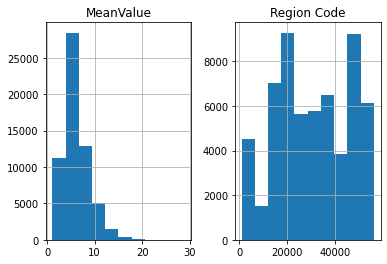

In [100]:
dfg2.hist()

So from here we can see that employment rate low counties are not in top return on investement giving county. This is also affecting the housing market. So we should take care where there is unemployment just do more reserch don't invest blindly.

# 9. Web Scraping for further data

In [60]:
# Importing the required library
from bs4 import BeautifulSoup
import requests 

# 10. U.S. Top states and territories by income

In [61]:
url='https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income'
response= requests.get(url)
soup=BeautifulSoup(response.text ,'html.parser')
#print(soup)

In [62]:
table = soup.find('table', {'class':'wikitable sortable'}).tbody


In [63]:
rows= table.find_all('tr')

In [64]:
columns= [v.text.replace('\n', ''.replace('[note 2]','')) for v in rows[0].find_all('th')]

In [65]:
#columns

In [66]:
uspercapitaincome= pd.DataFrame(columns= columns)
#print(uspercapitaincome)
for i in range(1,len(rows)):
    tds= rows[i].find_all('td')
    #print(uspercapitaincome)
    if len (tds) ==7:
        values=[tds[0].text.replace('\xa0',''.replace('\n','')), tds[1].text.replace('\xa0','').replace('\n',''), tds[2].text.replace('$','').replace(',',''), tds[3].text.replace('$','').replace(',',''), tds[4].text.replace('$','').replace(',',''), tds[5].text.replace('$','').replace(',',''), tds[6].text.replace('\n','').replace('$','').replace(',','')]
    else:
        values= [td.text.replace('\xa0','').replace('/n','') for td in tds]
        
    uspercapitaincome=uspercapitaincome.append(pd.Series(values, index= columns), ignore_index= True)   
#print(uspercapitaincome )



In [67]:
uspercapitaincome=uspercapitaincome.append(pd.Series(values, index= columns), ignore_index= True)
uspercapitaincome.rename(columns={'2014[note 2]':'2014'}, inplace=True)


# 11. Highest earning State or Territory

In [68]:
uspercapitaincome.head(25)

,Rank,State or territory,2018,2017,2016,2015,2014
0,1,"Washington, D.C.",85203,82372,75506,75628,71648
1,2,Maryland,83242,80776,78945,75847,73971
2,3,New Jersey,81740,80088,76126,72222,71919
3,4,Hawaii,80212,77765,74511,73486,69592
4,5,Massachusetts,79835,77385,75297,70628,69160
5,6,Connecticut,76348,74168,73433,71346,70048
6,7,California,75277,71805,67739,64500,61933
7,8,New Hampshire,74991,73381,70936,70303,66532
8,9,Alaska,74346,73181,76440,73355,71583
9,10,Washington,74073,70979,67106,64129,61366


People from Washington, D.C, Maryland, New Jersey, Hawaii, Massachusetts, Connecticut, California, New Hampshire, Alaska, Washington, Virginia, Colorado, Utah, Minnesota, New York are earning more than rest of U.S. States or Territory in Decending order respectively. In which some cities are very old and some cities are little new or very recently recognised.
states like Utah and california are in our list of good Return on investment so this is a better option for living and earning both. so this feature also affects the housing price.

In [69]:
uspercap=uspercapitaincome.drop(['State or territory'], axis ='columns')


In [70]:
uspercap=uspercap.drop([20,47, 53,54,55], axis=0)

In [71]:
uspercap.head(10)

,Rank,2018,2017,2016,2015,2014
0,1,85203,82372,75506,75628,71648
1,2,83242,80776,78945,75847,73971
2,3,81740,80088,76126,72222,71919
3,4,80212,77765,74511,73486,69592
4,5,79835,77385,75297,70628,69160
5,6,76348,74168,73433,71346,70048
6,7,75277,71805,67739,64500,61933
7,8,74991,73381,70936,70303,66532
8,9,74346,73181,76440,73355,71583
9,10,74073,70979,67106,64129,61366


In [72]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['Rank'], var_name='Year', value_name = 'MeanValue')
    melted['Year'] = pd.to_datetime(melted['Year'], format = '%Y-%m')
    melted = melted.dropna(subset=['MeanValue'])
    return melted

In [73]:
uspercap1= melt_data(uspercap)
uspercap1.set_index('Year', inplace = True)

In [74]:
uspercap1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2018-01-01 to 2014-01-01
Data columns (total 2 columns):
Rank         265 non-null object
MeanValue    265 non-null object
dtypes: object(2)
memory usage: 6.2+ KB


In [75]:
uspercap1.Rank.astype(int)
uspercap1.MeanValue.astype(int)

Year
2018-01-01    85203
2018-01-01    83242
2018-01-01    81740
2018-01-01    80212
2018-01-01    79835
              ...  
2014-01-01    41262
2014-01-01    39680
2014-01-01    41059
2014-01-01    18928
2014-01-01    18928
Name: MeanValue, Length: 265, dtype: int32

In [76]:
uspercap1

,Rank,MeanValue
Year,,
2018-01-01,1,85203
2018-01-01,2,83242
2018-01-01,3,81740
2018-01-01,4,80212
2018-01-01,5,79835
...,...,...
2014-01-01,50,41262
2014-01-01,51,39680
2014-01-01,52,41059


In [77]:
uspercap1.describe()

,Rank,MeanValue
count,265,265
unique,52,259
top,56,20078
freq,10,2


# Fastest growing city

In [78]:
fastgrow= pd.read_html('https://www.census.gov/newsroom/press-releases/2020/south-west-fastest-growing.html')[0]

In [79]:

fastgrow.drop(labels=None, axis=0, index=0, inplace= True)
fastgrow.columns=fastgrow.iloc[0]
fastgrow= fastgrow[0:]

In [80]:
fastgrow= fastgrow.set_index('Rank')

In [81]:
fastgrow.reset_index(inplace=True)

In [82]:
fastgrow

1,Rank,Area Name,State Name,Percent Increase,2019 Total Population,Region
0,Rank,Area Name,State Name,Percent Increase,2019 Total Population,Region
1,1,Frisco city,Texas,71.1,200490,South
2,2,Buckeye city,Arizona,56.6,79620,West
3,3,New Braunfels city,Texas,56.4,90209,South
4,4,McKinney city,Texas,51.9,199177,South
5,5,South Jordan city,Utah,51.8,76598,West
6,6,Meridian city,Idaho,48.3,114161,West
7,7,Cedar Park city,Texas,44.2,79462,South
8,8,Fort Myers city,Florida,39.8,87103,South
9,9,Conroe city,Texas,39.3,91079,South


Top 15 fastest growing city is given in the list. Frisco city with 71.1%, Buckeye city with 56.6%, New Braunfels city with 56.4%, McKinney city with 51.9%, South Jordan city with 51.8%, Meridian city with 48.3%, Cedar Park city with 44.2%, Fort Myers city with 39.8%, Conroe city with 39.3%, Irvine city with 35.5% are the cities with growing superfast pace. So there will be more people there will be more houses needed. Hence the states like Texas, Arizona, Utah, Idaho, California, Florida are very good to invest. specially in the above cities. And the surprising these cities are with 71.1% from South or West. As we have seen above in table Highest earning State or Territory  that people from State or Territory Utah, California are the one of the highest earning states and these cities are also one of the fastest growing then we can invest in these Terrorities.

# 12. Conclusion

From exploring the data, visualising the data, sorting and correlating we can conclude from the above that the factors like
1. Neighbourhood
2. Crime
3. Unemployment
4. Income
5. Growth of the Population
6. Hospital 

are the factors which affect the house prices and we should take consideration of this at the time of invest. 